In [1]:
import cv2

In [2]:
!pip install easyocr
!pip install imutils

In [3]:
import cv2
from matplotlib import pyplot as plt
import easyocr
import imutils
import numpy as np


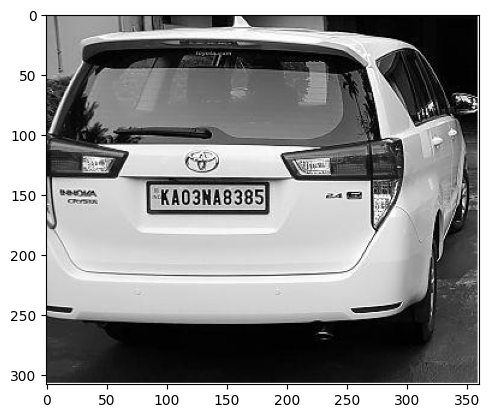

In [4]:
img = cv2.imread('C:/Users/DELL/Desktop/SIH/img1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

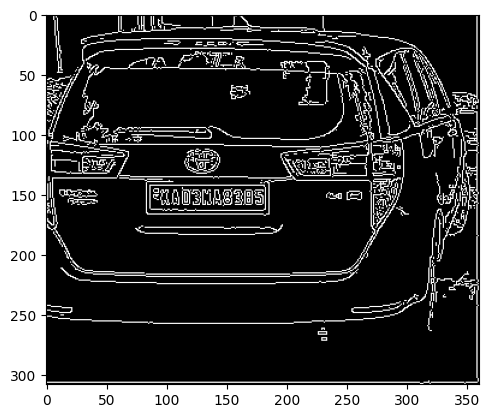

In [5]:
bfilter = cv2.bilateralFilter(gray,11,17,17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [7]:
location = None
for con in contours:
    approx = cv2.approxPolyDP(con, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [8]:
location

array([[[ 86, 142]],

       [[ 87, 162]],

       [[182, 162]],

       [[181, 142]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

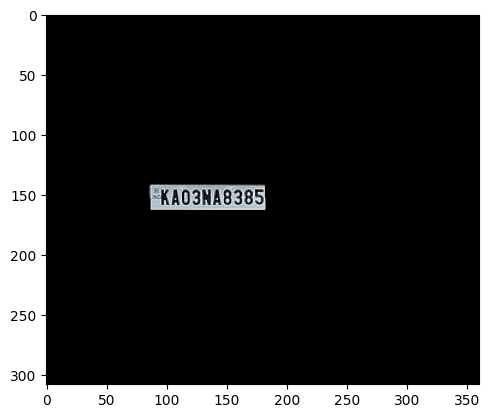

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

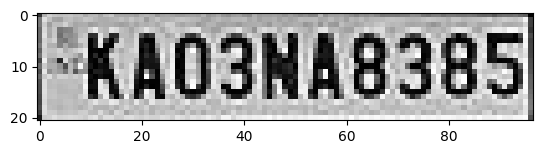

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result
extracted_text = []
for detection in result:
    text = detection[1]  # The text is stored at index 1 in each detection
    extracted_text.append(text)

# Now, 'extracted_text' will contain the extracted text from the image
print(extracted_text)

['"Ka03na8385']


In [16]:
import pandas as pd
with open("saving.csv", "w", encoding = "utf-8"):
    

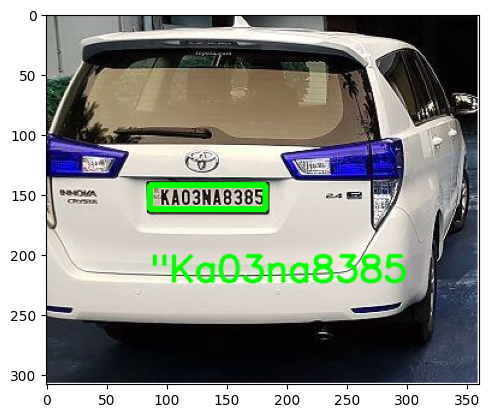

In [14]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0,255,0), thickness = 2, lineType = cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]),tuple(approx[2][0]), (0,255,0),3)
plt.imshow(res)

In [23]:
import csv
csv_file = "C:/Users/DELL/Downloads/numberplate.csv"

file_exists = True
try:
    with open(csv_file, 'r') as file:
        pass
except FileNotFoundError:
    file_exists = False

with open(csv_file, mode='a' if file_exists else 'w', newline='') as file:
    writer = csv.writer(file)


    if not file_exists:
        writer.writerow(['PLATE NUMBER'])
    writer.writerow(extracted_text)

    print(f'Output data has been saved to {csv_file}.')



Output data has been saved to C:/Users/DELL/Downloads/numberplate.csv.
